**Задача.** Необходимо загрузить и обработать предложенный датасет(Титаник),провести аналитику данных с помощью фреймворка Python Pandas.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

1. Загрузка датасета

In [23]:
url = 'https://drive.google.com/file/d/16MAuRsO7t_0hjWJPp4YN7cojyo3TA60p/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id=' + url.split('/')[-2]
TitanicDB = pd.read_csv(path)
TitanicDB.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


2. Определение количества пустых ячеек.

In [24]:
TitanicDB.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [25]:
TitanicDB.isnull().sum().sum()

866

In [ ]:
# NoNull=TitanicDB.dropna()
# NoNull

In [26]:
TitanicDB.dtypes #Для сведения проверяем типы данных в нашем датафрейме

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

3. Заполнение пустых ячеек.
Для столбца с возрастом Age выбрана замена на среднее значение, для ячеек столбцов номера каюты Cabin и порта посадки Embarked выбрана замена на значение строки 'Null', что бы в дальнейшем при необходимости было видно, где необходимо доработать датафрейм.

In [27]:
TitanicDB = TitanicDB.fillna({'Age': TitanicDB['Age'].mean(), 'Cabin':'Null',
                 'Embarked':'Null'})
TitanicDB.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

4. Находим количество уникальных значений для каждого столбца.

In [28]:
number_unique = TitanicDB.nunique()
number_unique

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             89
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

5. Находим количество минимальное значение (только для цифровых значений) для каждого столбца.

In [29]:
min_value = TitanicDB.min(numeric_only=True)
min_value

PassengerId    1.00
Survived       0.00
Pclass         1.00
Age            0.42
SibSp          0.00
Parch          0.00
Fare           0.00
dtype: float64

6. Находим количество максимальное значение (только для цифровых значений) для каждого столбца.

In [30]:
max_value = TitanicDB.max(numeric_only=True)
max_value

PassengerId    891.0000
Survived         1.0000
Pclass           3.0000
Age             80.0000
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

7. С помощью метода корреляции выявляем влияние всех признаков на признак Survived (выживание)

In [31]:
TitanicDB.corr(method='spearman', numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041560,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,0.041560,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,-0.061161,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000



Логично, что PassengerId не является тем признаком, который повлиял на выживание, соответственно корректируем выбор столбцов.

In [32]:
columns = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
correlatio = TitanicDB[columns].corr(method='spearman')
correlatio

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000


Строим 'тепловую карту' для получившийся корреляции.

<Axes: >

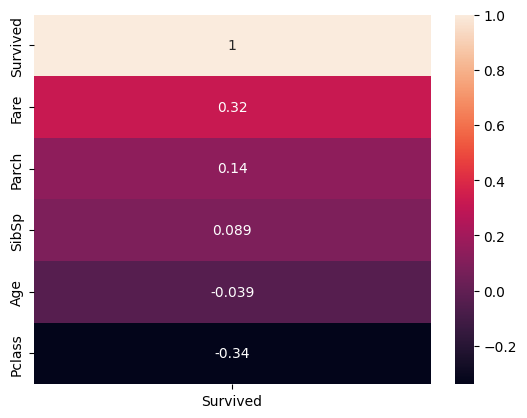

In [33]:
sns.heatmap(correlatio[['Survived']].sort_values(by='Survived', ascending=False), annot=True)

**Выводы:**
Наибольшее положительное влияние на признак Survived (выживание) оказали следующие признаки:
- цена билета Fare;
- количество родителей или детей, с которыми путешествовал каждый пассажир Parch;
- число братьев, сестер или супругов на борту учеловека SibSp.

8. Для наглядности построим графики зависимости признака Survived от вышеуказанных признаков.

8.1 Fare.

Для начала определим количество (повторно) уникальных значений, что бы в дальнейшем организовать ось Х.

In [75]:
fare = pd.Series(sorted(TitanicDB['Fare'].unique()))
fare

0        0.0000
1        4.0125
2        5.0000
3        6.2375
4        6.4375
         ...   
243    227.5250
244    247.5208
245    262.3750
246    263.0000
247    512.3292
Length: 248, dtype: float64

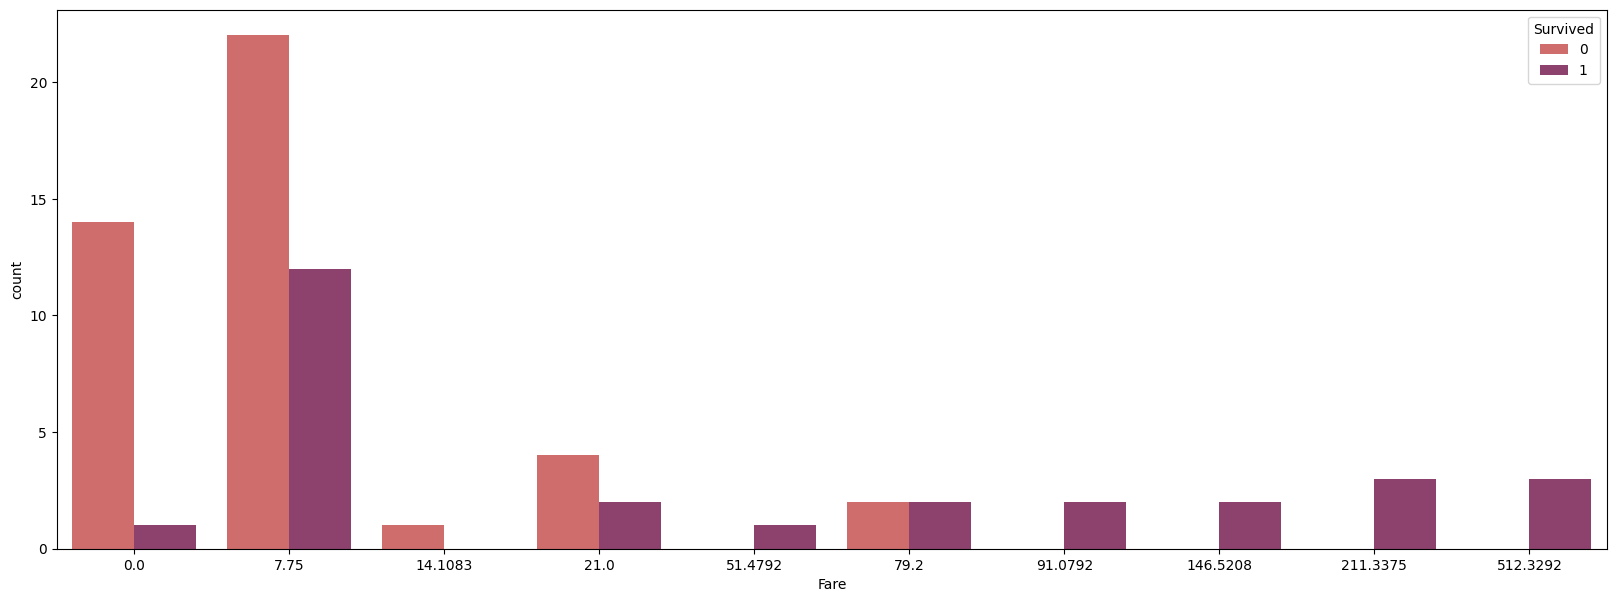

In [80]:
countplt, ax = plt.subplots(figsize = (20,7))
fare_order = [fare[0], fare[30], fare[92], fare[123], fare[185], fare[216], fare[226], fare[236], fare[240], fare[247]]
ax = sns.countplot(x = 'Fare', hue = 'Survived', data = TitanicDB, order=fare_order, palette='flare')

Из графиков видно, что при росте цены билета вероятность выживания растет, вплоть до 100% при цене билета близкой к максимальной.

8.2 Parch.

Для начала определим количество (повторно) уникальных значений, что бы в дальнейшем организовать ось Х.

In [83]:
parch = pd.Series(sorted(TitanicDB['Parch'].unique()))
parch

0    0
1    1
2    2
3    3
4    4
5    5
6    6
dtype: int64

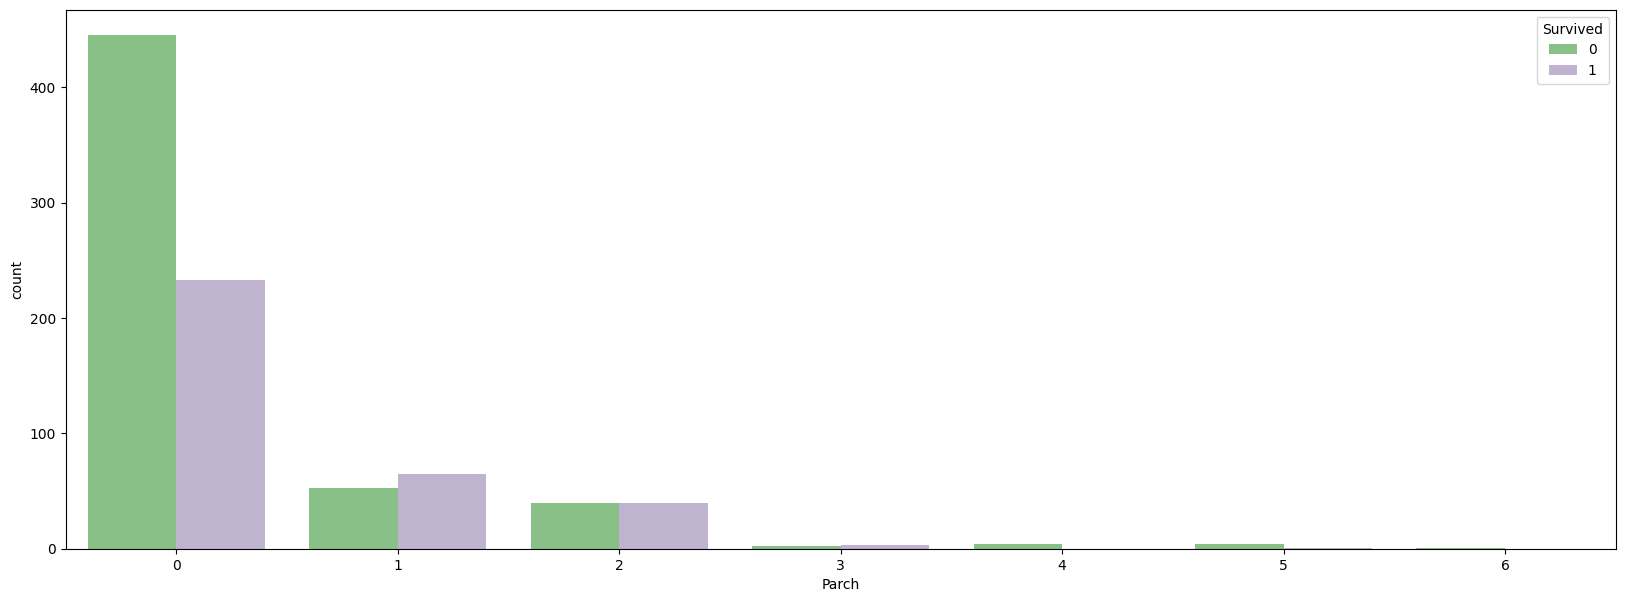

In [85]:
countplt, ax = plt.subplots(figsize = (20,7))
parch_order = parch
ax = sns.countplot(x = 'Parch', hue = 'Survived', data = TitanicDB, order=parch_order, palette='Accent')

График показал неоднозначный результат. С одной стороны наличие родителей/детей повышало шансы на выживание, но с другой стороны при большом количестве родственников шансы на вышивание стремились к нулю.

8.3 SibSp.

Для начала определим количество (повторно) уникальных значений, что бы в дальнейшем организовать ось Х.

In [86]:
sibsp = pd.Series(sorted(TitanicDB['SibSp'].unique()))
sibsp

0    0
1    1
2    2
3    3
4    4
5    5
6    8
dtype: int64

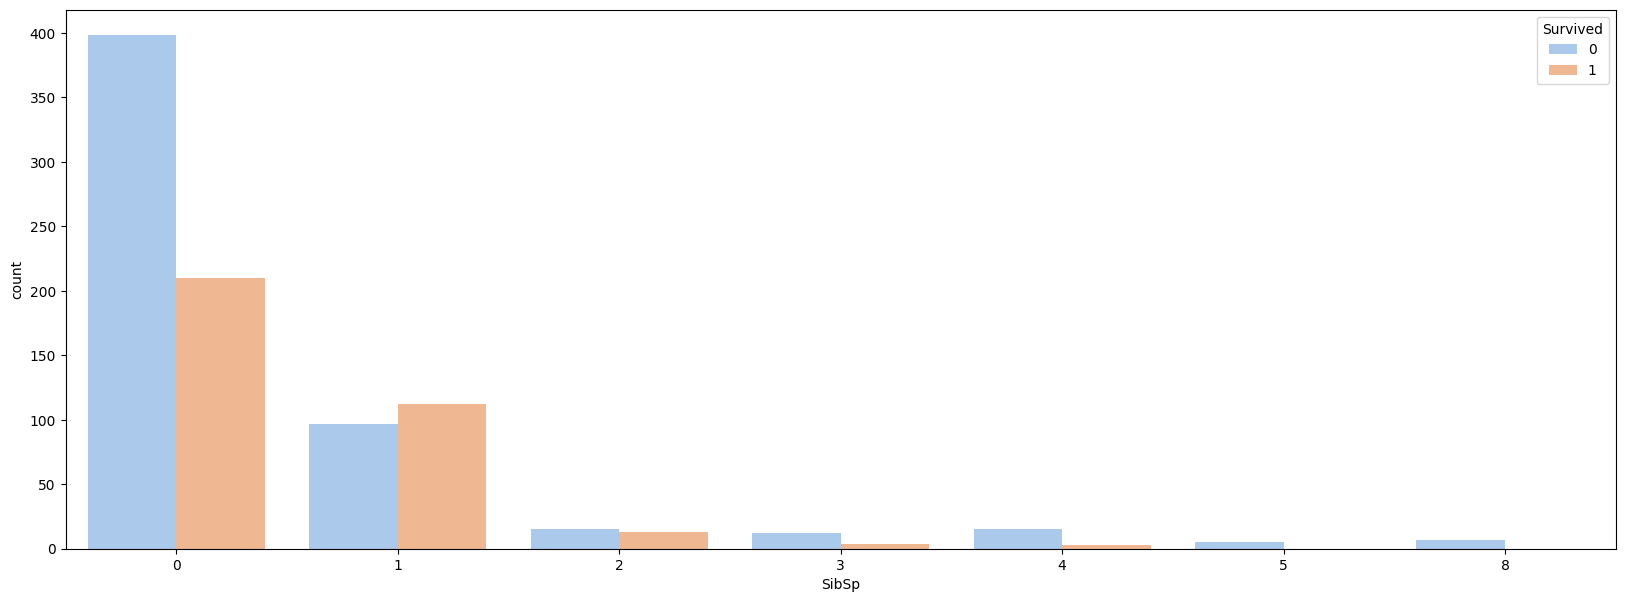

In [88]:
countplt, ax = plt.subplots(figsize = (20,7))
sibsp_order = sibsp
ax = sns.countplot(x = 'SibSp', hue = 'Survived', data = TitanicDB, order=sibsp_order, palette='pastel')

Наличие на "Титанике" супруга/-ги или братьев/сестер немного повышало шансы на выживание при наличии одного родственника.